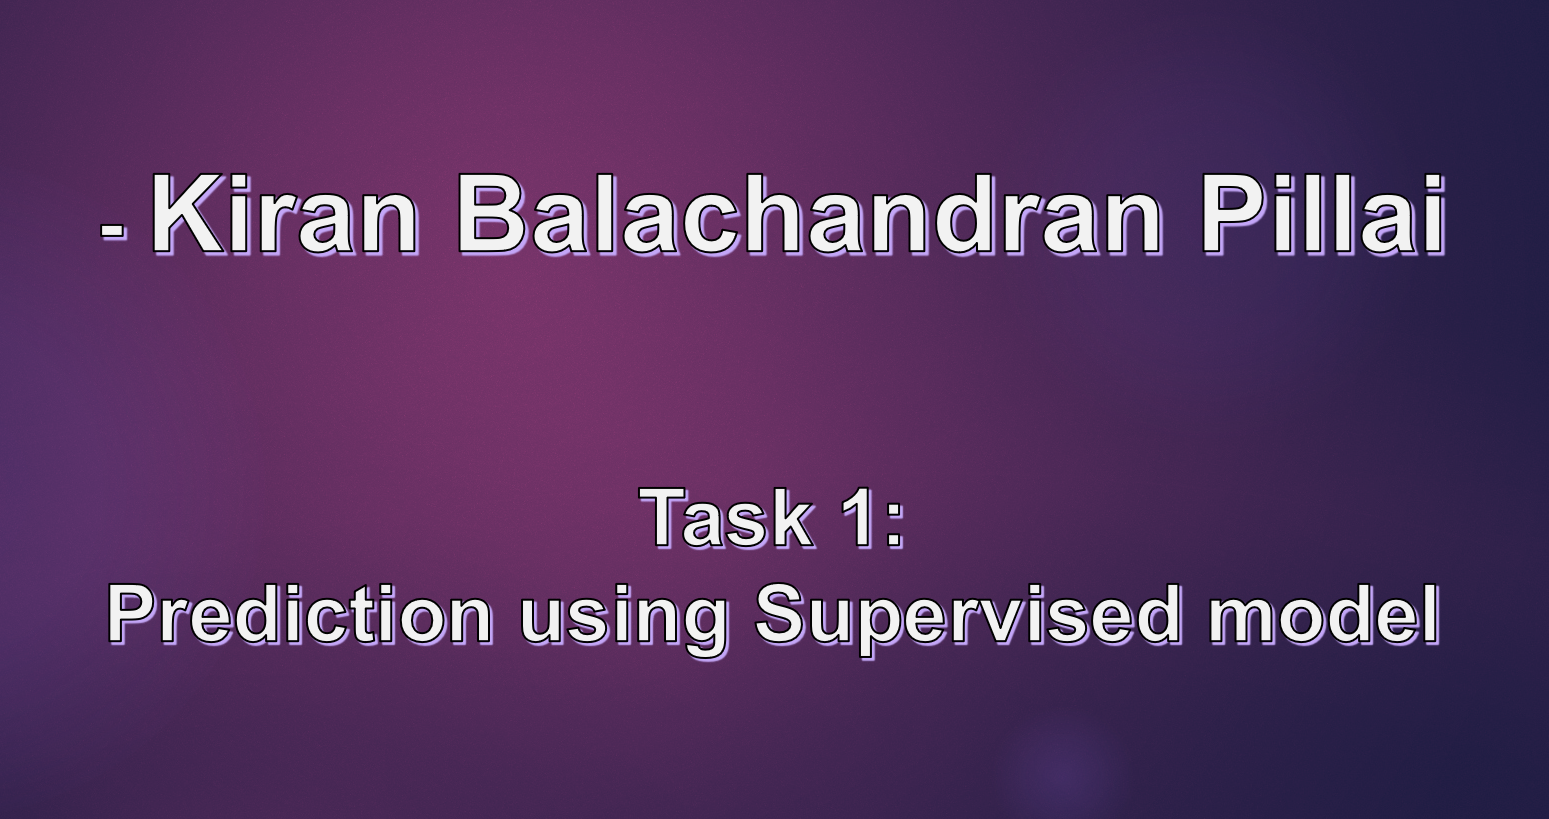

#Importing *Dataset*

In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

## Problem Statement: We have to predict score of a student based on the Hours a student spend in studying.

Since the value which we have to predict i.e. Scores is continuous variable, hence its a regression problem, thus we can use Regression Analysis.

Since the target variable is given for prediction, hence we can say it is a Supervised model



dataframe.info() gives us an overview of the dataset, that is things like datatype of each column , number of attributes, etc.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We can see that there are two columns of which Scores column is the target variable and Hours is the feature. There are 25 data samples.


Printing all the values in the dataset.

In [ ]:
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Checking if there is any missing values.

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Checking the correlation between the variables using scatter plot.

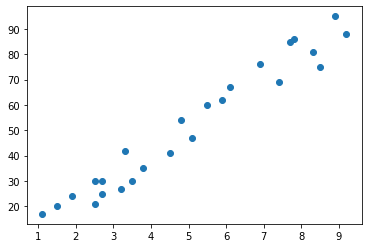

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(data['Hours'],data["Scores"])

Variables have strong positive correlation.

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20) # Splitting data into 80%-20% Train-test

# Building the model

In [ ]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # Initializing
lr.fit(X_train,y_train) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Prediction

In [ ]:
predTest = lr.predict(X_test) # Predicting the test data
predTest

array([49.0404248 , 76.57502569, 46.19201781, 39.54573484, 68.97927372])

# Evaluating

In [ ]:
import sklearn.metrics as sm
print('Mean Absolute Error:', sm.mean_absolute_error(y_test, predTest)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, predTest), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test, predTest), 2)) 
print("R2 score =", round(sm.r2_score(y_test, predTest), 2))

Mean Absolute Error: 6.02860568687907
Mean squared error = 38.5
Explain variance score = 0.91
R2 score = 0.9


An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

 

# Predicting Score of a student who studies 9.25hrs.

In [ ]:
own_pred = lr.predict([[9.25]])
print(own_pred)

[91.29179514]


Student's Score will be 91.3